# Will I be able to graduate??

With recent advancements in generative AI and the modern state-of-arts not taking any breaks in beating one another. It can be tough being a data science student, trying to keep up with the knowledge to prevent it from depreciating so much.

Will I be able to graduate or will I drop out?? Well, let's build a model to find out!

We will be using the UCI Machine Learning Repositry to extract dataset id 697, which contains the profiles of university students, like gender, admission grade, or even their mother's occupation, with the target variable of whether they are enrolled, graduated or dropped out.

We will be using the supervised classification method XGBoost, which is going to also give us explainability on which features had higher impact/importance, and in the end, I will be entering my own data into the model to see if I can graduate this course or not!

In [1]:
# Import Packages

from ucimlrepo import fetch_ucirepo
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from matplotlib import pyplot as plt

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
# Extract Data

base = fetch_ucirepo(id=697)
X = base.data.features
y = base.data.targets

In [3]:
# We are only interested in the target output of graduated and dropped out, label to int

print(len(X),len(y))
X = X.drop(y[y['Target']=='Enrolled'].index).copy()
y = y.drop(y[y['Target']=='Enrolled'].index).copy()
print(len(X),len(y))
y = y.replace(['Graduate','Dropout'],[1,0]).astype('int')

4424 4424
3630 3630


In [4]:
# Check for missing values

for col in X.columns:
    if len(X[X[col].isna()==True]) != 0:
        print(col)


### Data Preprocessing

In [5]:
# Firstly let's find out discrete variables, hot encode variables, and normalise continuous variables

discrete_var = ['Marital Status','Application mode','Course','Daytime/evening attendance',
   'Previous qualification','Nacionality',"Mother's qualification", "Father's qualification",
   "Mother's occupation","Father's occupation",'Displaced','Educational special needs',
'Debtor','Tuition fees up to date','Gender','Scholarship holder','International']

X[discrete_var] = X[discrete_var].astype('str')
continuous_var = list(set(X.columns).difference(set(discrete_var)))

scale = StandardScaler()
X[continuous_var] = scale.fit_transform(X[continuous_var])

features = X[continuous_var].join(pd.get_dummies(X[['Marital Status','Application mode','Course','Daytime/evening attendance',
   'Previous qualification','Nacionality',"Mother's qualification", "Father's qualification",
   "Mother's occupation","Father's occupation",'Displaced','Educational special needs',
'Debtor','Tuition fees up to date','Gender','Scholarship holder','International']]))

In [6]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(features, y,test_size = 0.2,random_state = 123)

### Training XGB Model

In [7]:
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, eta=0.1, max_depth=3)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
pred_train = xgb_classifier.predict(X_train)
pred_test = xgb_classifier.predict(X_test)

### Evaluation

In [9]:
def xgb_eval(y_train, pred_train,y_test, pred_test):
    print('Train Evaluation')
    confusion_matrix = sklearn.metrics.confusion_matrix(y_train, pred_train)
    cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    print('Accuracy:',sklearn.metrics.accuracy_score(y_train, pred_train).round(2))
    print('Precision:',sklearn.metrics.precision_score(y_train, pred_train).round(2))
    print('Recall:',sklearn.metrics.recall_score(y_train, pred_train).round(2))
    print('f1:',sklearn.metrics.f1_score(y_train, pred_train).round(2))
    cm_display.plot()
    plt.show()

    print('Test Evaluation')
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred_test)
    cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    print('Accuracy:',sklearn.metrics.accuracy_score(y_test, pred_test).round(2))
    print('Precision:',sklearn.metrics.precision_score(y_test, pred_test).round(2))
    print('Recall:',sklearn.metrics.recall_score(y_test, pred_test).round(2))
    print('f1:',sklearn.metrics.f1_score(y_test, pred_test).round(2))
    cm_display.plot()
    plt.show()

    print('AUC Train:',sklearn.metrics.roc_auc_score(y_train, pred_train).round(2))
    print('AUC Test:',sklearn.metrics.roc_auc_score(y_test, pred_test).round(2))
    fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(y_train, pred_train)
    fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(y_test, pred_test)
    plt.plot(fpr1, tpr1)
    plt.plot(fpr2, tpr2)
    plt.show()

Train Evaluation
Accuracy: 1.0
Precision: 0.99
Recall: 1.0
f1: 1.0


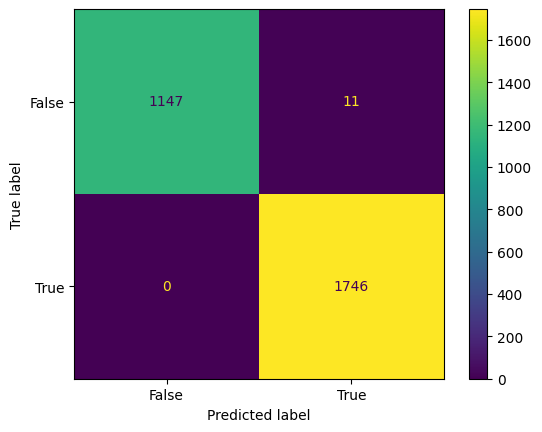

Test Evaluation
Accuracy: 0.9
Precision: 0.91
Recall: 0.93
f1: 0.92


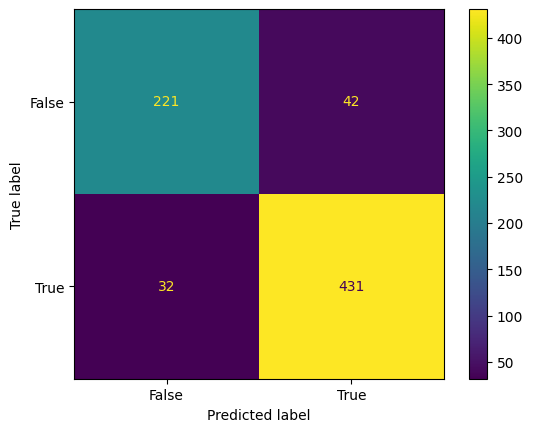

AUC Train: 1.0
AUC Test: 0.89


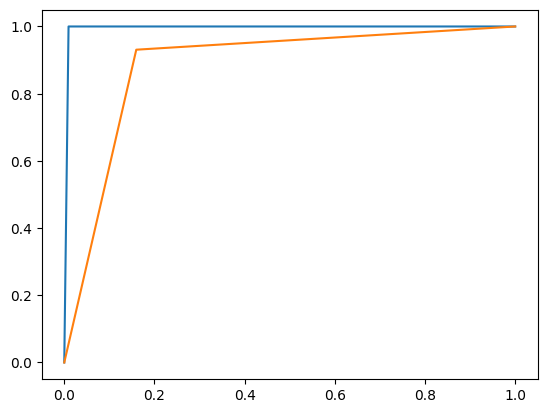

In [10]:
xgb_eval(y_train, pred_train,y_test, pred_test)

### Simplify the model

Text(0.5, 1.0, 'XGB Feature Importance')

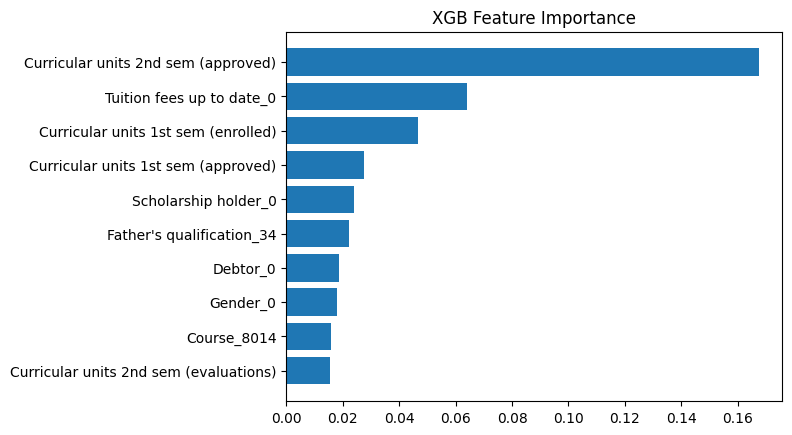

In [11]:
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:],xgb_classifier.feature_importances_[sorted_idx][-10:])
plt.title('XGB Feature Importance')

In [12]:
newvar = ['Curricular units 2nd sem (approved)','Tuition fees up to date_0','Curricular units 2nd sem (enrolled)',
   'Curricular units 1st sem (approved)','Scholarship holder_0','Debtor_0','Curricular units 1st sem (enrolled)',
   'Gender_0','Course_9130']

xgb_classifier2 = xgb.XGBClassifier(n_estimators=1000, eta=0.1, max_depth=3)
xgb_classifier2.fit(X_train[newvar], y_train)

pred_train2 = xgb_classifier2.predict(X_train[newvar])
pred_test2 = xgb_classifier2.predict(X_test[newvar])

Train Evaluation
Accuracy: 0.93
Precision: 0.92
Recall: 0.97
f1: 0.94


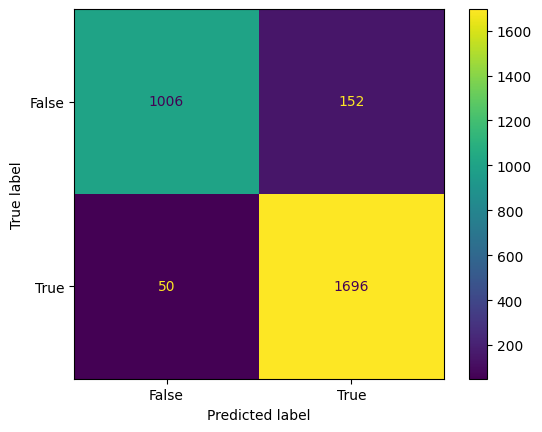

Test Evaluation
Accuracy: 0.91
Precision: 0.92
Recall: 0.94
f1: 0.93


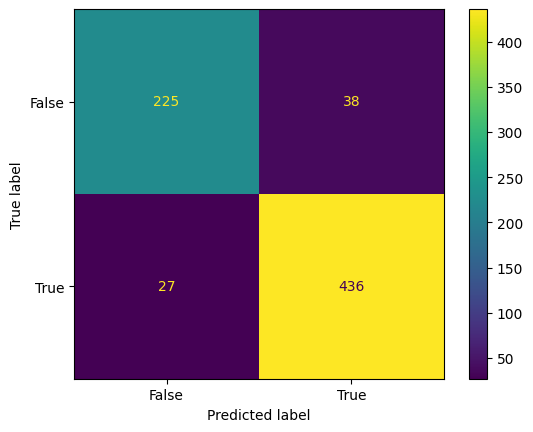

AUC Train: 0.92
AUC Test: 0.9


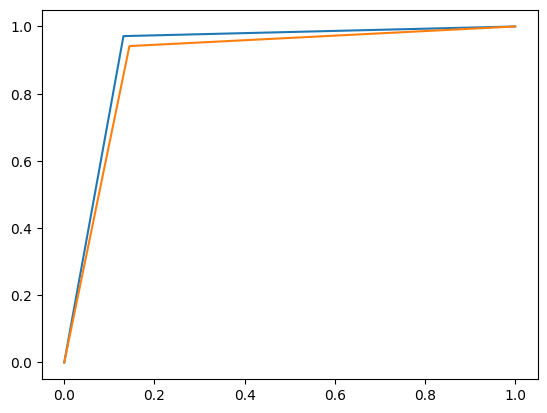

In [13]:
xgb_eval(y_train, pred_train2,y_test, pred_test2)

### Moment of truths, will I graduate?

In [14]:
mydata = X_train[newvar].head(1).copy()
mydata['Curricular units 2nd sem (approved)'] = 3
mydata['Tuition fees up to date_0'] = False
mydata['Curricular units 2nd sem (enrolled)'] = 3
mydata['Curricular units 1st sem (approved)'] = 3
mydata['Scholarship holder_0'] = True
mydata['Debtor_0'] = True
mydata['Curricular units 1st sem (enrolled)'] = 3
mydata['Gender_0'] = False
mydata['Course_9130'] = True

cont_val = ['Curricular units 2nd sem (approved)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 1st sem (enrolled)']

mydata[cont_val] = scale.fit_transform(mydata[cont_val])

xgb_classifier2.predict(mydata)


array([1])

Yes!